In [20]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.10f}'.format

In [9]:
df = pd.read_csv('../datasets/pepeusdt_15m.csv')
df.head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,kline,1719606278429,PEPEUSDT,1719605700000,1719606599999,15m,131572261,131573175,0.0000117600,0.0000117600,0.0000117900,0.0000117400,54918803914.0000000000,915,False,646195.5187450800,30580076845.0000000000,359857.6444073500,0
1,kline,1719606281084,PEPEUSDT,1719605700000,1719606599999,15m,131572261,131573176,0.0000117600,0.0000117500,0.0000117900,0.0000117400,54929553163.0000000000,916,False,646321.8224208300,30580076845.0000000000,359857.6444073500,0
2,kline,1719606283972,PEPEUSDT,1719605700000,1719606599999,15m,131572261,131573177,0.0000117600,0.0000117600,0.0000117900,0.0000117400,54930403503.0000000000,917,False,646331.8224192300,30580927185.0000000000,359867.6444057500,0
3,kline,1719606286973,PEPEUSDT,1719605700000,1719606599999,15m,131572261,131573179,0.0000117600,0.0000117500,0.0000117900,0.0000117400,54957530981.0000000000,919,False,646650.5702857299,30580927185.0000000000,359867.6444057500,0
4,kline,1719606290973,PEPEUSDT,1719605700000,1719606599999,15m,131572261,131573180,0.0000117600,0.0000117600,0.0000117900,0.0000117400,55189023018.0000000000,920,False,649372.9166408500,30812419222.0000000000,362589.9907608700,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84980 entries, 0 to 84979
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   event_type                    84980 non-null  object 
 1   event_time                    84980 non-null  int64  
 2   symbol                        84980 non-null  object 
 3   kline_start_time              84980 non-null  int64  
 4   kline_close_time              84980 non-null  int64  
 5   interval                      84980 non-null  object 
 6   first_trade_id                84980 non-null  int64  
 7   last_trade_id                 84980 non-null  int64  
 8   open_price                    84980 non-null  float64
 9   close_price                   84980 non-null  float64
 10  high_price                    84980 non-null  float64
 11  low_price                     84980 non-null  float64
 12  volume                        84980 non-null  float64
 13  n

In [11]:
df['kline_close_time'] = pd.to_datetime(df['kline_close_time'], unit='ms')
df['kline_start_time'] = pd.to_datetime(df['kline_start_time'], unit='ms')
df['event_time'] = pd.to_datetime(df['event_time'], unit='ms')

In [12]:
df.head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,kline,2024-06-28 20:24:38.429,PEPEUSDT,2024-06-28 20:15:00,2024-06-28 20:29:59.999,15m,131572261,131573175,0.0000117600,0.0000117600,0.0000117900,0.0000117400,54918803914.0000000000,915,False,646195.5187450800,30580076845.0000000000,359857.6444073500,0
1,kline,2024-06-28 20:24:41.084,PEPEUSDT,2024-06-28 20:15:00,2024-06-28 20:29:59.999,15m,131572261,131573176,0.0000117600,0.0000117500,0.0000117900,0.0000117400,54929553163.0000000000,916,False,646321.8224208300,30580076845.0000000000,359857.6444073500,0
2,kline,2024-06-28 20:24:43.972,PEPEUSDT,2024-06-28 20:15:00,2024-06-28 20:29:59.999,15m,131572261,131573177,0.0000117600,0.0000117600,0.0000117900,0.0000117400,54930403503.0000000000,917,False,646331.8224192300,30580927185.0000000000,359867.6444057500,0
3,kline,2024-06-28 20:24:46.973,PEPEUSDT,2024-06-28 20:15:00,2024-06-28 20:29:59.999,15m,131572261,131573179,0.0000117600,0.0000117500,0.0000117900,0.0000117400,54957530981.0000000000,919,False,646650.5702857299,30580927185.0000000000,359867.6444057500,0
4,kline,2024-06-28 20:24:50.973,PEPEUSDT,2024-06-28 20:15:00,2024-06-28 20:29:59.999,15m,131572261,131573180,0.0000117600,0.0000117600,0.0000117900,0.0000117400,55189023018.0000000000,920,False,649372.9166408500,30812419222.0000000000,362589.9907608700,0


In [13]:
df = df.sort_values(by='event_time')

In [14]:
df[df['event_time'].duplicated(keep=False)]

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore


In [10]:
df['time_diff_event_time'] = df['event_time'].diff()
df['event_time_seconds'] = df['time_diff_event_time'].dt.total_seconds()
df['event_time_seconds'] = df['event_time_seconds'].round().astype('Int64')

In [12]:
mean = df['event_time_seconds'].mean()
std = df['event_time_seconds'].std()


df['z_score'] = (df['event_time_seconds'] - mean) / std
anomalies = df[df['z_score'].abs() > 3]
anomalies[['event_time_seconds', 'z_score']].sort_values(ascending=False, by='event_time_seconds')

,event_time_seconds,z_score
51669,1625,279.6317723324
24714,28,4.2735496621
23956,28,4.2735496621
26279,28,4.2735496621
19523,26,3.9287053006
9435,26,3.9287053006
3736,25,3.7562831198
80949,25,3.7562831198
81117,25,3.7562831198
21398,24,3.5838609390


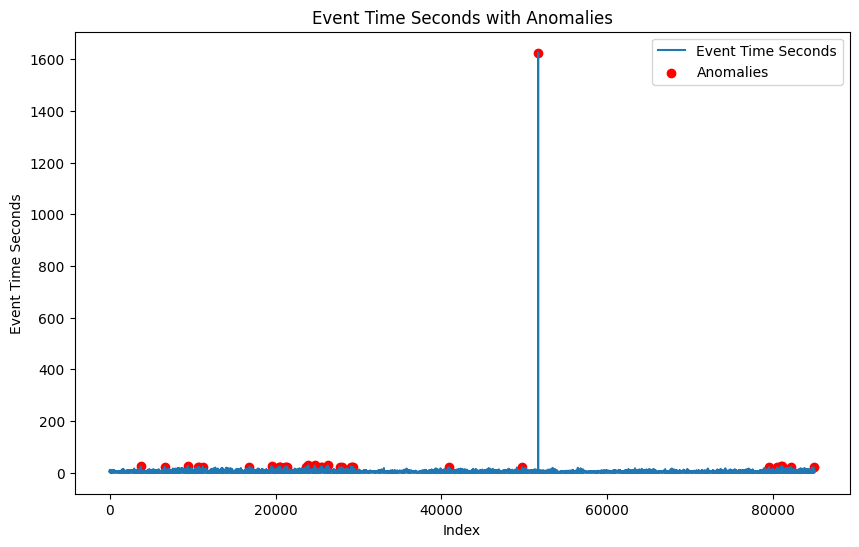

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['event_time_seconds'], label='Event Time Seconds')
plt.scatter(anomalies.index, anomalies['event_time_seconds'], color='red', label='Anomalies')
plt.xlabel('Index')
plt.ylabel('Event Time Seconds')
plt.title('Event Time Seconds with Anomalies')
plt.legend()
plt.show()

In [15]:
df.loc[51668:51670]

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,time_diff_event_time,event_time_seconds,z_score
51668,kline,2024-06-30 19:57:44.742,PEPEUSDT,2024-06-30 19:45:00,2024-06-30 19:59:59.999,15m,132181759,132184161,0.0000116300,0.0000116200,0.0000116600,0.0000115900,110669536406.0000000000,2403,False,1286225.9928179099,62371576635.0000000000,725219.4077923601,0,0 days 00:00:03.962000,4,0.1354173239
51669,kline,2024-06-30 20:24:49.402,PEPEUSDT,2024-06-30 20:15:00,2024-06-30 20:29:59.999,15m,132186994,132189414,0.0000116200,0.0000116600,0.0000116800,0.0000116100,143981033346.0000000000,2421,False,1677856.4287430700,100887982885.0000000000,1176024.5714325199,0,0 days 00:27:04.660000,1625,279.6317723324
51670,kline,2024-06-30 20:24:51.882,PEPEUSDT,2024-06-30 20:15:00,2024-06-30 20:29:59.999,15m,132186994,132189416,0.0000116200,0.0000116600,0.0000116800,0.0000116100,144008319842.0000000000,2423,False,1678174.5892864300,100887982885.0000000000,1176024.5714325199,0,0 days 00:00:02.480000,2,-0.2094270376


In [15]:
split_index = 51668

df1 = df.iloc[:split_index] 
df2 = df.iloc[split_index:]

train_1 = df1[df1['is_kline_closed'] == True]
train_2 = df2[df2['is_kline_closed'] == True]

combined_df = pd.concat([train_1, train_2], ignore_index=True)
combined_df  = combined_df .sort_values(by='event_time')
combined_df .head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,kline,2024-06-28 20:30:00.010,PEPEUSDT,2024-06-28 20:15:00,2024-06-28 20:29:59.999,15m,131572261,131573931,0.0000117600,0.0000117300,0.0000117900,0.0000117100,77034459569.0000000000,1671,True,905744.4611785000,38627523391.0000000000,454332.0434678300,0
1,kline,2024-06-28 20:45:00.010,PEPEUSDT,2024-06-28 20:30:00,2024-06-28 20:44:59.999,15m,131573932,131578050,0.0000117300,0.0000117000,0.0000117900,0.0000116700,149993939210.0000000000,4119,True,1757968.6877820501,65848676093.0000000000,771883.8538101000,0
2,kline,2024-06-28 21:00:00.012,PEPEUSDT,2024-06-28 20:45:00,2024-06-28 20:59:59.999,15m,131578051,131581785,0.0000117100,0.0000116600,0.0000117400,0.0000116200,107684329890.0000000000,3735,True,1256201.3578377001,44359445340.0000000000,518086.9603612100,0
3,kline,2024-06-28 21:15:00.012,PEPEUSDT,2024-06-28 21:00:00,2024-06-28 21:14:59.999,15m,131581786,131602465,0.0000116600,0.0000114900,0.0000116600,0.0000113800,579395615623.0000000000,20680,True,6666549.8866011798,225557997364.0000000000,2594463.1501727798,0
4,kline,2024-06-28 21:30:00.011,PEPEUSDT,2024-06-28 21:15:00,2024-06-28 21:29:59.999,15m,131602466,131608221,0.0000114900,0.0000115800,0.0000115900,0.0000114900,243299823748.0000000000,5756,True,2810839.6105832998,143155682567.0000000000,1653881.1501677900,0


Correlation Matrix:


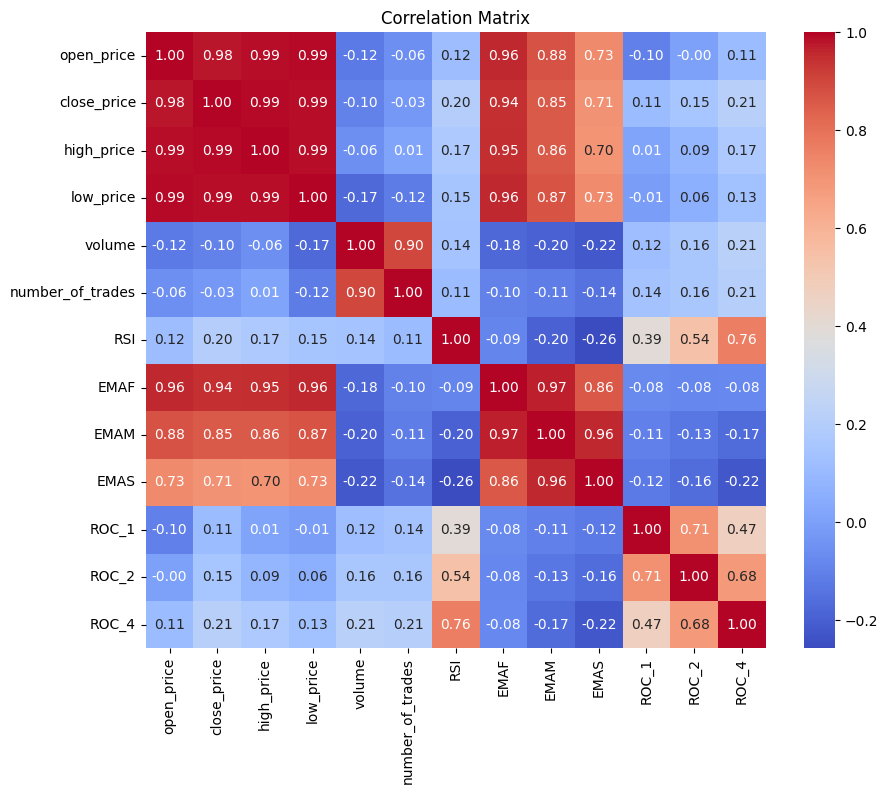

299


,open_price,close_price,high_price,low_price,volume,number_of_trades,RSI,EMAF,EMAM,EMAS,ROC_1,ROC_2,ROC_4
5,0.0000115700,0.0000115400,0.0000115700,0.0000115200,119443348139.0000000000,2144,24.3243243243,0.0000116459,0.0000116846,0.0000117048,-0.3454231434,0.4351610096,-1.3675213675
6,0.0000115400,0.0000115700,0.0000115900,0.0000114900,150622150378.0000000000,3107,30.0000000000,0.0000116342,0.0000116762,0.0000116995,0.2599653380,-0.0863557858,-0.7718696398
7,0.0000115700,0.0000115100,0.0000115700,0.0000114900,129878256101.0000000000,2878,27.9069767442,0.0000116151,0.0000116638,0.0000116921,-0.5185825411,-0.2599653380,0.1740644038
8,0.0000115100,0.0000114600,0.0000115300,0.0000114500,144007032901.0000000000,2960,27.2727272727,0.0000115913,0.0000116487,0.0000116830,-0.4344048653,-0.9507346586,-1.0362694301
9,0.0000114600,0.0000115400,0.0000115500,0.0000114500,90003380195.0000000000,1977,57.1428571429,0.0000115834,0.0000116407,0.0000116773,0.6980802792,0.2606429192,0.0000000000


In [16]:
columns_to_drop = [
    'ignore', 'is_kline_closed', 'event_time', 'symbol',
    'kline_start_time', 'kline_close_time', 'interval', 'event_type',
    'quote_assest_volume', 'take_buy_base_asset_volume', 'taker_buy_quote_asset_volume',
    'first_trade_id', 'last_trade_id'
]

combined_df = combined_df.drop(columns=columns_to_drop)

#RSI CALCULATION
def calculate_rsi(data, window=6):
    
    delta = data['close_price'].diff()

    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss

    rsi = 100 - (100 / (1 + rs))

    return rsi

combined_df['RSI'] = calculate_rsi(combined_df)


#EMAs CALCULATION
def calculate_ema(combined_df, span):
    return combined_df['close_price'].ewm(span=span, adjust=False).mean()

combined_df['EMAF'] = calculate_ema(combined_df, span=12)
combined_df['EMAM'] = calculate_ema(combined_df, span=26)
combined_df['EMAS'] = calculate_ema(combined_df, span=50)

#ROC CALCULATION
def calculate_roc(combined_df, n):
    return ((combined_df['close_price'] - combined_df['close_price'].shift(n)) / combined_df['close_price'].shift(n)) * 100


combined_df['ROC_1'] = calculate_roc(combined_df, 1)
combined_df['ROC_2'] = calculate_roc(combined_df, 2)
combined_df['ROC_4'] = calculate_roc(combined_df, 4)


combined_df = combined_df.dropna(subset=['close_price', 'RSI', 'ROC_1', 'ROC_2','ROC_4'])

correlation_matrix = combined_df.corr()

print("Correlation Matrix:")

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
print(len(combined_df))
combined_df.head()

In [17]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_df)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :-1])  
        y.append(data[i + seq_length, -1])     # ROC_1 as target
    return np.array(X), np.array(y)


sequence_length = 10  
n_features = scaled_data.shape[1] - 1  
n_units = 50  


X, y = create_sequences(scaled_data, sequence_length)

X = X.reshape((X.shape[0], X.shape[1], n_features))


split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(n_units, input_shape=(sequence_length, n_features)))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on test set: {mse}')

# Predictions
predictions = model.predict(X_test)

Epoch 1/50


c:\Users\HP\Desktop\Projects\tradingbot\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0888 - val_loss: 0.0276
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0400 - val_loss: 0.0218
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0273 - val_loss: 0.0156
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0227 - val_loss: 0.0161
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0217 - val_loss: 0.0158
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0191 - val_loss: 0.0141
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0203 - val_loss: 0.0133
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0190 - val_loss: 0.0128
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0203 - val_loss: 0.0124
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0192 - val_loss: 0.0121
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0167 - val_loss: 0.0116
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0200 - val_loss: 0.0112
Epoch 13/50
8/8 

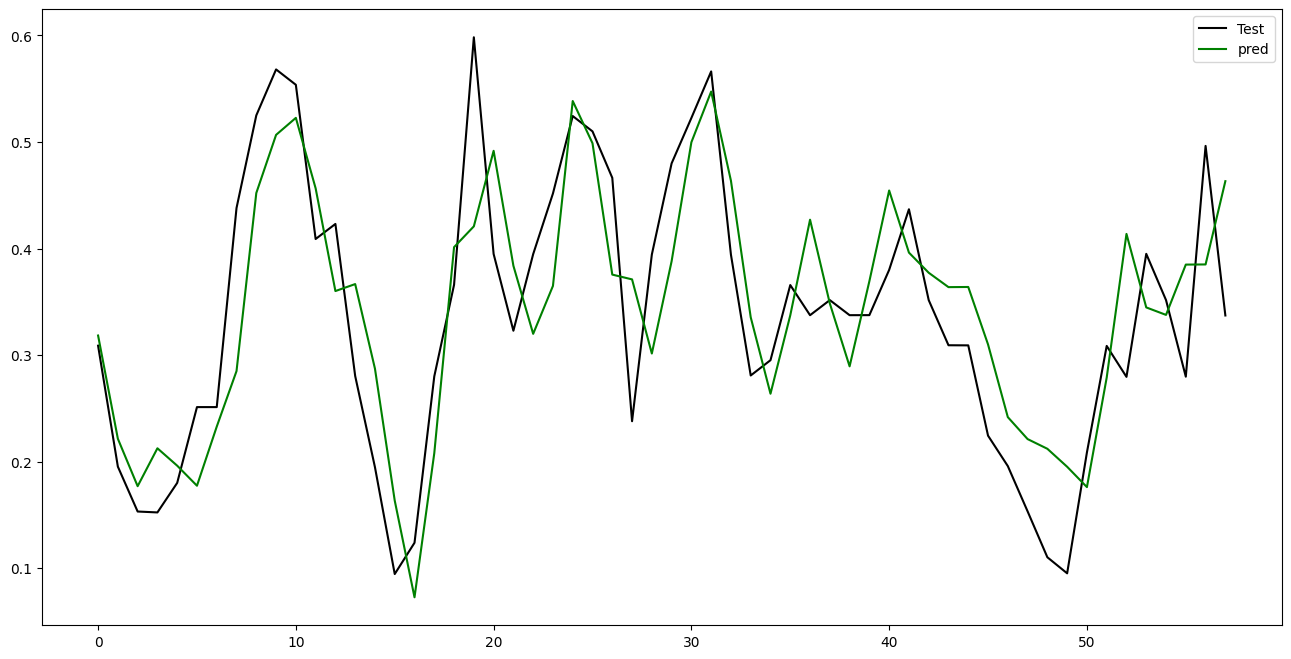

In [19]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(predictions, color = 'green', label = 'pred')
plt.legend()
plt.show()

Correlation Matrix:


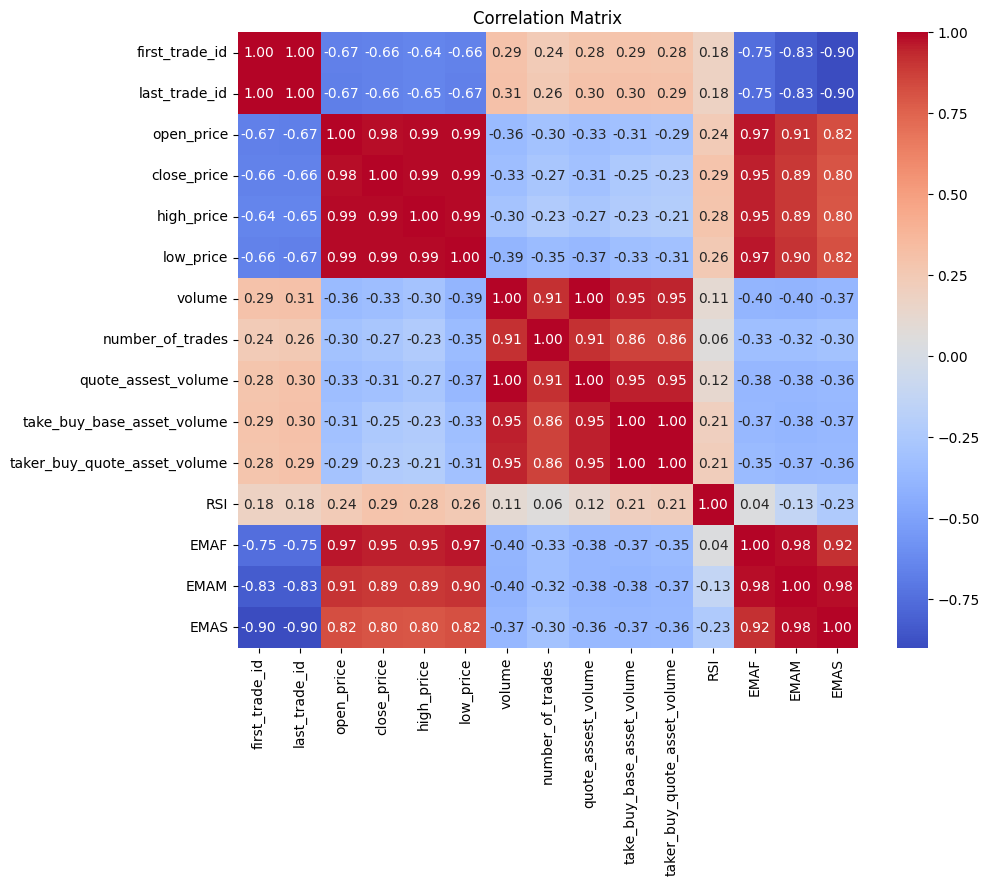

In [10]:


columns_to_drop = [
    'ignore', 'is_kline_closed', 'event_time', 'symbol',
    'kline_start_time', 'kline_close_time', 'interval', 'event_type'
]

train_1 = train_1.drop(columns=columns_to_drop)

columns_to_drop = [
    'ignore', 'is_kline_closed', 'event_time', 'symbol',
    'kline_start_time', 'kline_close_time', 'interval', 'event_type'
]

train_2 = train_2.drop(columns=columns_to_drop)

#RSI CALCULATION
def calculate_rsi(data, window=14):
    
    delta = data['close_price'].diff()

    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss

    rsi = 100 - (100 / (1 + rs))

    return rsi

train_1['RSI'] = calculate_rsi(train_1)
train_2['RSI'] = calculate_rsi(train_2)

#EMAs CALCULATION
def calculate_ema(data, span):
    return data['close_price'].ewm(span=span, adjust=False).mean()

train_1['EMAF'] = calculate_ema(train_1, span=12)
train_1['EMAM'] = calculate_ema(train_1, span=26)
train_1['EMAS'] = calculate_ema(train_1, span=50)

train_2['EMAF'] = calculate_ema(train_2, span=12)
train_2['EMAM'] = calculate_ema(train_2, span=26)
train_2['EMAS'] = calculate_ema(train_2, span=50)

train_1 = train_1.dropna(subset=['RSI'])
train_2 = train_2.dropna(subset=['RSI'])

correlation_matrix = train_1.corr()

print("Correlation Matrix:")

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
train_1 = train_1.dropna(subset=['RSI'])
train_2 = train_2.dropna(subset=['RSI'])

Correlation Matrix:


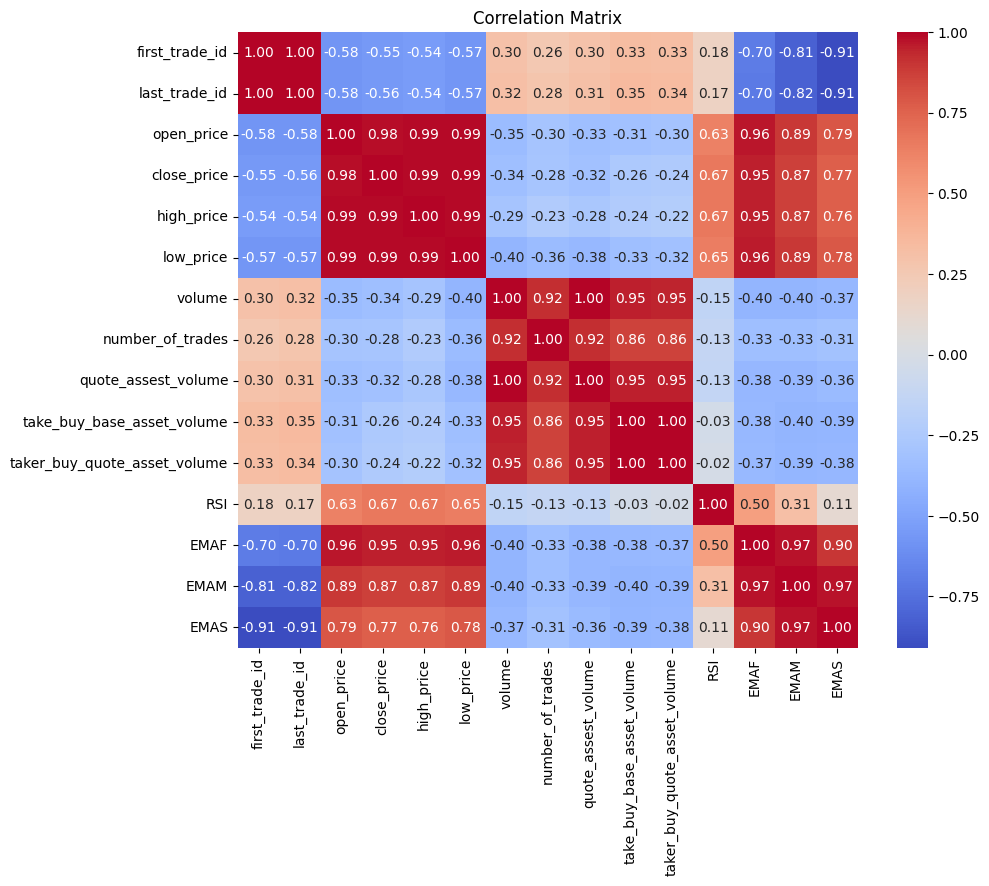

In [17]:
correlation_matrix = train_1.corr()

print("Correlation Matrix:")

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [58]:
df1 = pd.read_csv('../datasets/pepeusdt_5m.csv')
df1.head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,kline,1719606182967,PEPEUSDT,1719606000000,1719606299999,5m,131572709,131573022,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21865791172.0000000000,314,False,257149.5515482300,12380287280.0000000000,145601.3104659100,0
1,kline,1719606185966,PEPEUSDT,1719606000000,1719606299999,5m,131572709,131573024,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21974175367.0000000000,316,False,258425.2335233800,12488671475.0000000000,146876.9924410600,0
2,kline,1719606188444,PEPEUSDT,1719606000000,1719606299999,5m,131572709,131573025,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21984298991.0000000000,317,False,258544.3885778600,12498795099.0000000000,146996.1474955400,0
3,kline,1719606190966,PEPEUSDT,1719606000000,1719606299999,5m,131572709,131573026,0.0000117700,0.0000117700,0.0000117700,0.0000117400,22480616291.0000000000,318,False,264386.0431988600,12995112399.0000000000,152837.8021165400,0
4,kline,1719606193719,PEPEUSDT,1719606000000,1719606299999,5m,131572709,131573028,0.0000117700,0.0000117600,0.0000117700,0.0000117400,22489454157.0000000000,320,False,264490.0614647800,13003608575.0000000000,152937.8021080600,0


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85512 entries, 0 to 85511
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   event_type                    85512 non-null  object 
 1   event_time                    85512 non-null  int64  
 2   symbol                        85512 non-null  object 
 3   kline_start_time              85512 non-null  int64  
 4   kline_close_time              85512 non-null  int64  
 5   interval                      85512 non-null  object 
 6   first_trade_id                85512 non-null  int64  
 7   last_trade_id                 85512 non-null  int64  
 8   open_price                    85512 non-null  float64
 9   close_price                   85512 non-null  float64
 10  high_price                    85512 non-null  float64
 11  low_price                     85512 non-null  float64
 12  volume                        85512 non-null  float64
 13  n

In [60]:
df1['kline_close_time'] = pd.to_datetime(df1['kline_close_time'], unit='ms', utc=True)
df1['kline_start_time'] = pd.to_datetime(df1['kline_start_time'], unit='ms', utc=True)
df1['event_time'] = pd.to_datetime(df1['event_time'], unit='ms', utc=True)

# datetime to berlin timezone UTC+2

df1['kline_close_time'] = df1['kline_close_time'].dt.tz_convert('Europe/Berlin')
df1['kline_start_time'] = df1['kline_start_time'].dt.tz_convert('Europe/Berlin')
df1['event_time'] = df1['event_time'].dt.tz_convert('Europe/Berlin')


In [61]:
df1.head(50)

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,kline,2024-06-28 22:23:02.967000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573022,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21865791172.0000000000,314,False,257149.5515482300,12380287280.0000000000,145601.3104659100,0
1,kline,2024-06-28 22:23:05.966000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573024,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21974175367.0000000000,316,False,258425.2335233800,12488671475.0000000000,146876.9924410600,0
2,kline,2024-06-28 22:23:08.444000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573025,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21984298991.0000000000,317,False,258544.3885778600,12498795099.0000000000,146996.1474955400,0
3,kline,2024-06-28 22:23:10.966000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573026,0.0000117700,0.0000117700,0.0000117700,0.0000117400,22480616291.0000000000,318,False,264386.0431988600,12995112399.0000000000,152837.8021165400,0
4,kline,2024-06-28 22:23:13.719000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573028,0.0000117700,0.0000117600,0.0000117700,0.0000117400,22489454157.0000000000,320,False,264490.0614647800,13003608575.0000000000,152937.8021080600,0
5,kline,2024-06-28 22:23:16.108000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573029,0.0000117700,0.0000117700,0.0000117700,0.0000117400,22503192212.0000000000,321,False,264651.7583721300,13017346630.0000000000,153099.4990154100,0
6,kline,2024-06-28 22:23:18.199000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573044,0.0000117700,0.0000117500,0.0000117700,0.0000117400,23041667657.0000000000,336,False,270984.2212309700,13017346630.0000000000,153099.4990154100,0
7,kline,2024-06-28 22:23:20.594000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573046,0.0000117700,0.0000117500,0.0000117700,0.0000117400,23126889806.0000000000,338,False,271986.3801757800,13097216036.0000000000,154038.7632299700,0
8,kline,2024-06-28 22:23:22.613000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573099,0.0000117700,0.0000117500,0.0000117700,0.0000117400,23329729011.0000000000,391,False,274369.7408345300,13168882111.0000000000,154880.8396112200,0
9,kline,2024-06-28 22:23:36.376000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573100,0.0000117700,0.0000117400,0.0000117700,0.0000117400,23330097751.0000000000,392,False,274374.0698421300,13168882111.0000000000,154880.8396112200,0


In [62]:
df1 = df1.sort_values(by='event_time')

In [63]:
df1[df1['event_time'].duplicated(keep=False)]

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore


In [64]:
df1['time_diff_event_time'] = df1['event_time'].diff()
df1['event_time_seconds'] = df1['time_diff_event_time'].dt.total_seconds()
df1['event_time_seconds'] = df1['event_time_seconds'].round().astype('Int64')

In [65]:
df1['event_time_seconds'].sort_values(ascending=False).head()

52044    1616
24917      28
24154      28
26498      28
9528       26
Name: event_time_seconds, dtype: Int64

In [66]:
df1.loc[52043:52050]

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,time_diff_event_time,event_time_seconds
52043,kline,2024-06-30 21:57:44.742000+02:00,PEPEUSDT,2024-06-30 21:55:00+02:00,2024-06-30 21:59:59.999000+02:00,5m,132182675,132184161,0.0000116200,0.0000116200,0.0000116600,0.0000116100,39889932295.0000000000,1487,False,464430.9510943700,27919444115.0000000000,325118.8156118300,0,0 days 00:00:03.962000,4
52044,kline,2024-06-30 22:24:40.428000+02:00,PEPEUSDT,2024-06-30 22:20:00+02:00,2024-06-30 22:24:59.999000+02:00,5m,132187753,132189400,0.0000116300,0.0000116600,0.0000116800,0.0000116200,104902338546.0000000000,1648,False,1223440.6650151201,76356806692.0000000000,890723.8545267900,0,0 days 00:26:55.686000,1616
52045,kline,2024-06-30 22:24:42.892000+02:00,PEPEUSDT,2024-06-30 22:20:00+02:00,2024-06-30 22:24:59.999000+02:00,5m,132187753,132189402,0.0000116300,0.0000116600,0.0000116800,0.0000116200,105030013536.0000000000,1650,False,1224930.6149957699,76482766417.0000000000,892193.8045175400,0,0 days 00:00:02.464000,2
52046,kline,2024-06-30 22:24:44.900000+02:00,PEPEUSDT,2024-06-30 22:20:00+02:00,2024-06-30 22:24:59.999000+02:00,5m,132187753,132189406,0.0000116300,0.0000116700,0.0000116800,0.0000116200,105069867172.0000000000,1654,False,1225395.5060090099,76502528165.0000000000,892424.4241167000,0,0 days 00:00:02.008000,2
52047,kline,2024-06-30 22:24:47.053000+02:00,PEPEUSDT,2024-06-30 22:20:00+02:00,2024-06-30 22:24:59.999000+02:00,5m,132187753,132189412,0.0000116300,0.0000116600,0.0000116800,0.0000116200,105685040118.0000000000,1660,False,1232574.5567802701,77115950255.0000000000,899583.0599070000,0,0 days 00:00:02.153000,2
52048,kline,2024-06-30 22:24:49.402000+02:00,PEPEUSDT,2024-06-30 22:20:00+02:00,2024-06-30 22:24:59.999000+02:00,5m,132187753,132189414,0.0000116300,0.0000116600,0.0000116800,0.0000116200,106011986680.0000000000,1662,False,1236389.4353983800,77384120774.0000000000,902712.6098637300,0,0 days 00:00:02.349000,2
52049,kline,2024-06-30 22:24:51.882000+02:00,PEPEUSDT,2024-06-30 22:20:00+02:00,2024-06-30 22:24:59.999000+02:00,5m,132187753,132189416,0.0000116300,0.0000116600,0.0000116800,0.0000116200,106039273176.0000000000,1664,False,1236707.5959417401,77384120774.0000000000,902712.6098637300,0,0 days 00:00:02.480000,2
52050,kline,2024-06-30 22:24:54.019000+02:00,PEPEUSDT,2024-06-30 22:20:00+02:00,2024-06-30 22:24:59.999000+02:00,5m,132187753,132189421,0.0000116300,0.0000116700,0.0000116800,0.0000116200,106050018995.0000000000,1669,False,1236832.9821383900,77393115485.0000000000,902817.5781411000,0,0 days 00:00:02.137000,2


In [67]:
split_index_2 = 51668
split_index_1 = 52043

df15 = df.iloc[:split_index_2] 
df5 = df1.iloc[:split_index_1]

In [68]:
df15.head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,time_diff_event_time,event_time_seconds
0,kline,2024-06-28 22:24:38.429000+02:00,PEPEUSDT,2024-06-28 22:15:00+02:00,2024-06-28 22:29:59.999000+02:00,15m,131572261,131573175,0.0000117600,0.0000117600,0.0000117900,0.0000117400,54918803914.0000000000,915,False,646195.5187450800,30580076845.0000000000,359857.6444073500,0,NaT,<NA>
1,kline,2024-06-28 22:24:41.084000+02:00,PEPEUSDT,2024-06-28 22:15:00+02:00,2024-06-28 22:29:59.999000+02:00,15m,131572261,131573176,0.0000117600,0.0000117500,0.0000117900,0.0000117400,54929553163.0000000000,916,False,646321.8224208300,30580076845.0000000000,359857.6444073500,0,0 days 00:00:02.655000,3
2,kline,2024-06-28 22:24:43.972000+02:00,PEPEUSDT,2024-06-28 22:15:00+02:00,2024-06-28 22:29:59.999000+02:00,15m,131572261,131573177,0.0000117600,0.0000117600,0.0000117900,0.0000117400,54930403503.0000000000,917,False,646331.8224192300,30580927185.0000000000,359867.6444057500,0,0 days 00:00:02.888000,3
3,kline,2024-06-28 22:24:46.973000+02:00,PEPEUSDT,2024-06-28 22:15:00+02:00,2024-06-28 22:29:59.999000+02:00,15m,131572261,131573179,0.0000117600,0.0000117500,0.0000117900,0.0000117400,54957530981.0000000000,919,False,646650.5702857299,30580927185.0000000000,359867.6444057500,0,0 days 00:00:03.001000,3
4,kline,2024-06-28 22:24:50.973000+02:00,PEPEUSDT,2024-06-28 22:15:00+02:00,2024-06-28 22:29:59.999000+02:00,15m,131572261,131573180,0.0000117600,0.0000117600,0.0000117900,0.0000117400,55189023018.0000000000,920,False,649372.9166408500,30812419222.0000000000,362589.9907608700,0,0 days 00:00:04,4


In [69]:
df5.head()

,event_type,event_time,symbol,kline_start_time,kline_close_time,interval,first_trade_id,last_trade_id,open_price,close_price,high_price,low_price,volume,number_of_trades,is_kline_closed,quote_assest_volume,take_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,time_diff_event_time,event_time_seconds
0,kline,2024-06-28 22:23:02.967000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573022,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21865791172.0000000000,314,False,257149.5515482300,12380287280.0000000000,145601.3104659100,0,NaT,<NA>
1,kline,2024-06-28 22:23:05.966000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573024,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21974175367.0000000000,316,False,258425.2335233800,12488671475.0000000000,146876.9924410600,0,0 days 00:00:02.999000,3
2,kline,2024-06-28 22:23:08.444000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573025,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21984298991.0000000000,317,False,258544.3885778600,12498795099.0000000000,146996.1474955400,0,0 days 00:00:02.478000,2
3,kline,2024-06-28 22:23:10.966000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573026,0.0000117700,0.0000117700,0.0000117700,0.0000117400,22480616291.0000000000,318,False,264386.0431988600,12995112399.0000000000,152837.8021165400,0,0 days 00:00:02.522000,3
4,kline,2024-06-28 22:23:13.719000+02:00,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709,131573028,0.0000117700,0.0000117600,0.0000117700,0.0000117400,22489454157.0000000000,320,False,264490.0614647800,13003608575.0000000000,152937.8021080600,0,0 days 00:00:02.753000,3


In [70]:
merged_df = pd.merge(df15, df5, on='event_time', how='outer', indicator=True)

num_matching_rows = merged_df.shape[0]
num_matching_rows

56395

In [71]:
merged_df.head()

,event_type_x,event_time,symbol_x,kline_start_time_x,kline_close_time_x,interval_x,first_trade_id_x,last_trade_id_x,open_price_x,close_price_x,high_price_x,low_price_x,volume_x,number_of_trades_x,is_kline_closed_x,quote_assest_volume_x,take_buy_base_asset_volume_x,taker_buy_quote_asset_volume_x,ignore_x,time_diff_event_time_x,event_time_seconds_x,event_type_y,symbol_y,kline_start_time_y,kline_close_time_y,interval_y,first_trade_id_y,last_trade_id_y,open_price_y,close_price_y,high_price_y,low_price_y,volume_y,number_of_trades_y,is_kline_closed_y,quote_assest_volume_y,take_buy_base_asset_volume_y,taker_buy_quote_asset_volume_y,ignore_y,time_diff_event_time_y,event_time_seconds_y,_merge
0,NaN,2024-06-28 22:23:02.967000+02:00,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,kline,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709.0000000000,131573022.0000000000,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21865791172.0000000000,314.0000000000,False,257149.5515482300,12380287280.0000000000,145601.3104659100,0.0000000000,NaT,<NA>,right_only
1,NaN,2024-06-28 22:23:05.966000+02:00,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,kline,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709.0000000000,131573024.0000000000,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21974175367.0000000000,316.0000000000,False,258425.2335233800,12488671475.0000000000,146876.9924410600,0.0000000000,0 days 00:00:02.999000,3,right_only
2,NaN,2024-06-28 22:23:08.444000+02:00,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,kline,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709.0000000000,131573025.0000000000,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21984298991.0000000000,317.0000000000,False,258544.3885778600,12498795099.0000000000,146996.1474955400,0.0000000000,0 days 00:00:02.478000,2,right_only
3,NaN,2024-06-28 22:23:10.966000+02:00,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,kline,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709.0000000000,131573026.0000000000,0.0000117700,0.0000117700,0.0000117700,0.0000117400,22480616291.0000000000,318.0000000000,False,264386.0431988600,12995112399.0000000000,152837.8021165400,0.0000000000,0 days 00:00:02.522000,3,right_only
4,NaN,2024-06-28 22:23:13.719000+02:00,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,kline,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709.0000000000,131573028.0000000000,0.0000117700,0.0000117600,0.0000117700,0.0000117400,22489454157.0000000000,320.0000000000,False,264490.0614647800,13003608575.0000000000,152937.8021080600,0.0000000000,0 days 00:00:02.753000,3,right_only


In [72]:
merged_df['_merge'].unique()

['right_only', 'both', 'left_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [73]:
merged_df[merged_df['_merge'] == 'left_only'].head()

,event_type_x,event_time,symbol_x,kline_start_time_x,kline_close_time_x,interval_x,first_trade_id_x,last_trade_id_x,open_price_x,close_price_x,high_price_x,low_price_x,volume_x,number_of_trades_x,is_kline_closed_x,quote_assest_volume_x,take_buy_base_asset_volume_x,taker_buy_quote_asset_volume_x,ignore_x,time_diff_event_time_x,event_time_seconds_x,event_type_y,symbol_y,kline_start_time_y,kline_close_time_y,interval_y,first_trade_id_y,last_trade_id_y,open_price_y,close_price_y,high_price_y,low_price_y,volume_y,number_of_trades_y,is_kline_closed_y,quote_assest_volume_y,take_buy_base_asset_volume_y,taker_buy_quote_asset_volume_y,ignore_y,time_diff_event_time_y,event_time_seconds_y,_merge
41,kline,2024-06-28 22:25:21.976000+02:00,PEPEUSDT,2024-06-28 22:15:00+02:00,2024-06-28 22:29:59.999000+02:00,15m,131572261.0000000000,131573210.0000000000,0.0000117600,0.0000117600,0.0000117900,0.0000117400,56325856037.0000000000,950.0000000000,False,662741.7658858700,31842256358.0000000000,374700.8754802300,0.0000000000,0 days 00:00:02.671000,3,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,left_only
106,kline,2024-06-28 22:29:13.991000+02:00,PEPEUSDT,2024-06-28 22:15:00+02:00,2024-06-28 22:29:59.999000+02:00,15m,131572261.0000000000,131573513.0000000000,0.0000117600,0.0000117400,0.0000117900,0.0000117300,66549412501.0000000000,1253.0000000000,False,782854.3231037300,35124034135.0000000000,413268.5801103500,0.0000000000,0 days 00:00:02.927000,3,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,left_only
112,kline,2024-06-28 22:29:25.991000+02:00,PEPEUSDT,2024-06-28 22:15:00+02:00,2024-06-28 22:29:59.999000+02:00,15m,131572261.0000000000,131573842.0000000000,0.0000117600,0.0000117200,0.0000117900,0.0000117100,68770062672.0000000000,1582.0000000000,False,808885.3788551800,35745276481.0000000000,420550.6927620300,0.0000000000,0 days 00:00:02.248000,2,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,left_only
122,kline,2024-06-28 22:29:55.993000+02:00,PEPEUSDT,2024-06-28 22:15:00+02:00,2024-06-28 22:29:59.999000+02:00,15m,131572261.0000000000,131573928.0000000000,0.0000117600,0.0000117300,0.0000117900,0.0000117100,77000717486.0000000000,1668.0000000000,False,905348.6665449101,38593781308.0000000000,453936.2488342400,0.0000000000,0 days 00:00:02.311000,2,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,left_only
126,kline,2024-06-28 22:30:03+02:00,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:44:59.999000+02:00,15m,-1.0000000000,-1.0000000000,0.0000117300,0.0000117300,0.0000117300,0.0000117300,0.0000000000,0.0000000000,False,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0 days 00:00:02.990000,3,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,left_only


In [74]:
merged_df[merged_df['_merge'] == 'right_only'].head()

,event_type_x,event_time,symbol_x,kline_start_time_x,kline_close_time_x,interval_x,first_trade_id_x,last_trade_id_x,open_price_x,close_price_x,high_price_x,low_price_x,volume_x,number_of_trades_x,is_kline_closed_x,quote_assest_volume_x,take_buy_base_asset_volume_x,taker_buy_quote_asset_volume_x,ignore_x,time_diff_event_time_x,event_time_seconds_x,event_type_y,symbol_y,kline_start_time_y,kline_close_time_y,interval_y,first_trade_id_y,last_trade_id_y,open_price_y,close_price_y,high_price_y,low_price_y,volume_y,number_of_trades_y,is_kline_closed_y,quote_assest_volume_y,take_buy_base_asset_volume_y,taker_buy_quote_asset_volume_y,ignore_y,time_diff_event_time_y,event_time_seconds_y,_merge
0,NaN,2024-06-28 22:23:02.967000+02:00,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,kline,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709.0000000000,131573022.0000000000,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21865791172.0000000000,314.0000000000,False,257149.5515482300,12380287280.0000000000,145601.3104659100,0.0000000000,NaT,<NA>,right_only
1,NaN,2024-06-28 22:23:05.966000+02:00,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,kline,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709.0000000000,131573024.0000000000,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21974175367.0000000000,316.0000000000,False,258425.2335233800,12488671475.0000000000,146876.9924410600,0.0000000000,0 days 00:00:02.999000,3,right_only
2,NaN,2024-06-28 22:23:08.444000+02:00,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,kline,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709.0000000000,131573025.0000000000,0.0000117700,0.0000117700,0.0000117700,0.0000117400,21984298991.0000000000,317.0000000000,False,258544.3885778600,12498795099.0000000000,146996.1474955400,0.0000000000,0 days 00:00:02.478000,2,right_only
3,NaN,2024-06-28 22:23:10.966000+02:00,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,kline,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709.0000000000,131573026.0000000000,0.0000117700,0.0000117700,0.0000117700,0.0000117400,22480616291.0000000000,318.0000000000,False,264386.0431988600,12995112399.0000000000,152837.8021165400,0.0000000000,0 days 00:00:02.522000,3,right_only
4,NaN,2024-06-28 22:23:13.719000+02:00,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,<NA>,kline,PEPEUSDT,2024-06-28 22:20:00+02:00,2024-06-28 22:24:59.999000+02:00,5m,131572709.0000000000,131573028.0000000000,0.0000117700,0.0000117600,0.0000117700,0.0000117400,22489454157.0000000000,320.0000000000,False,264490.0614647800,13003608575.0000000000,152937.8021080600,0.0000000000,0 days 00:00:02.753000,3,right_only


In [75]:
matching_rows = merged_df[(merged_df['open_price_y'] == merged_df['open_price_x']) &
                          (merged_df['close_price_y'] == merged_df['close_price_x']) &
                          (merged_df['high_price_y'] == merged_df['high_price_x']) &
                          (merged_df['low_price_y'] == merged_df['low_price_x'])]

# Count the number of rows

num_matching_rows = matching_rows.shape[0]

print(f'Number of rows where all columns match: {num_matching_rows}')

Number of rows where all columns match: 16466


In [76]:
matching_rows.head()

,event_type_x,event_time,symbol_x,kline_start_time_x,kline_close_time_x,interval_x,first_trade_id_x,last_trade_id_x,open_price_x,close_price_x,high_price_x,low_price_x,volume_x,number_of_trades_x,is_kline_closed_x,quote_assest_volume_x,take_buy_base_asset_volume_x,taker_buy_quote_asset_volume_x,ignore_x,time_diff_event_time_x,event_time_seconds_x,event_type_y,symbol_y,kline_start_time_y,kline_close_time_y,interval_y,first_trade_id_y,last_trade_id_y,open_price_y,close_price_y,high_price_y,low_price_y,volume_y,number_of_trades_y,is_kline_closed_y,quote_assest_volume_y,take_buy_base_asset_volume_y,taker_buy_quote_asset_volume_y,ignore_y,time_diff_event_time_y,event_time_seconds_y,_merge
127,kline,2024-06-28 22:30:05.778000+02:00,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:44:59.999000+02:00,15m,131573932.0000000000,131573953.0000000000,0.0000117300,0.0000117400,0.0000117400,0.0000117300,1483158933.0000000000,22.0000000000,False,17399.5844093700,1483158933.0000000000,17399.5844093700,0.0000000000,0 days 00:00:02.778000,3,kline,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:34:59.999000+02:00,5m,131573932.0000000000,131573953.0000000000,0.0000117300,0.0000117400,0.0000117400,0.0000117300,1483158933.0000000000,22.0000000000,False,17399.5844093700,1483158933.0000000000,17399.5844093700,0.0000000000,0 days 00:00:02.782000,3,both
128,kline,2024-06-28 22:30:08.218000+02:00,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:44:59.999000+02:00,15m,131573932.0000000000,131573970.0000000000,0.0000117300,0.0000117400,0.0000117400,0.0000117300,2388546728.0000000000,39.0000000000,False,28028.8371226700,1932925138.0000000000,22679.8396560700,0.0000000000,0 days 00:00:02.440000,2,kline,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:34:59.999000+02:00,5m,131573932.0000000000,131573970.0000000000,0.0000117300,0.0000117400,0.0000117400,0.0000117300,2388546728.0000000000,39.0000000000,False,28028.8371226700,1932925138.0000000000,22679.8396560700,0.0000000000,0 days 00:00:02.440000,2,both
129,kline,2024-06-28 22:30:12.994000+02:00,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:44:59.999000+02:00,15m,131573932.0000000000,131573971.0000000000,0.0000117300,0.0000117500,0.0000117500,0.0000117300,2391192728.0000000000,40.0000000000,False,28059.9276226700,1935571138.0000000000,22710.9301560700,0.0000000000,0 days 00:00:04.776000,5,kline,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:34:59.999000+02:00,5m,131573932.0000000000,131573971.0000000000,0.0000117300,0.0000117500,0.0000117500,0.0000117300,2391192728.0000000000,40.0000000000,False,28059.9276226700,1935571138.0000000000,22710.9301560700,0.0000000000,0 days 00:00:04.776000,5,both
130,kline,2024-06-28 22:30:16.994000+02:00,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:44:59.999000+02:00,15m,131573932.0000000000,131573972.0000000000,0.0000117300,0.0000117400,0.0000117500,0.0000117300,2394702280.0000000000,41.0000000000,False,28101.1297631500,1935571138.0000000000,22710.9301560700,0.0000000000,0 days 00:00:04,4,kline,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:34:59.999000+02:00,5m,131573932.0000000000,131573972.0000000000,0.0000117300,0.0000117400,0.0000117500,0.0000117300,2394702280.0000000000,41.0000000000,False,28101.1297631500,1935571138.0000000000,22710.9301560700,0.0000000000,0 days 00:00:04,4,both
131,kline,2024-06-28 22:30:19.994000+02:00,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:44:59.999000+02:00,15m,131573932.0000000000,131573973.0000000000,0.0000117300,0.0000117500,0.0000117500,0.0000117300,2433204407.0000000000,42.0000000000,False,28553.5297554000,1974073265.0000000000,23163.3301483200,0.0000000000,0 days 00:00:03,3,kline,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:34:59.999000+02:00,5m,131573932.0000000000,131573973.0000000000,0.0000117300,0.0000117500,0.0000117500,0.0000117300,2433204407.0000000000,42.0000000000,False,28553.5297554000,1974073265.0000000000,23163.3301483200,0.0000000000,0 days 00:00:03,3,both


In [77]:
matching_rows['time_diff_event_time'] = matching_rows['event_time'].diff()
matching_rows['event_time_seconds'] = matching_rows['time_diff_event_time'].dt.total_seconds()
matching_rows['event_time_seconds'] = matching_rows['event_time_seconds'].round().astype('Int64')

C:\Users\HP\AppData\Local\Temp\ipykernel_17396\307297085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_rows['time_diff_event_time'] = matching_rows['event_time'].diff()
C:\Users\HP\AppData\Local\Temp\ipykernel_17396\307297085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_rows['event_time_seconds'] = matching_rows['time_diff_event_time'].dt.total_seconds()
C:\Users\HP\AppData\Local\Temp\ipykernel_17396\307297085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [78]:
matching_rows['event_time_seconds'].sort_values(ascending=False).head()

54815    625
25917    624
26991    620
50264    619
22201    618
Name: event_time_seconds, dtype: Int64

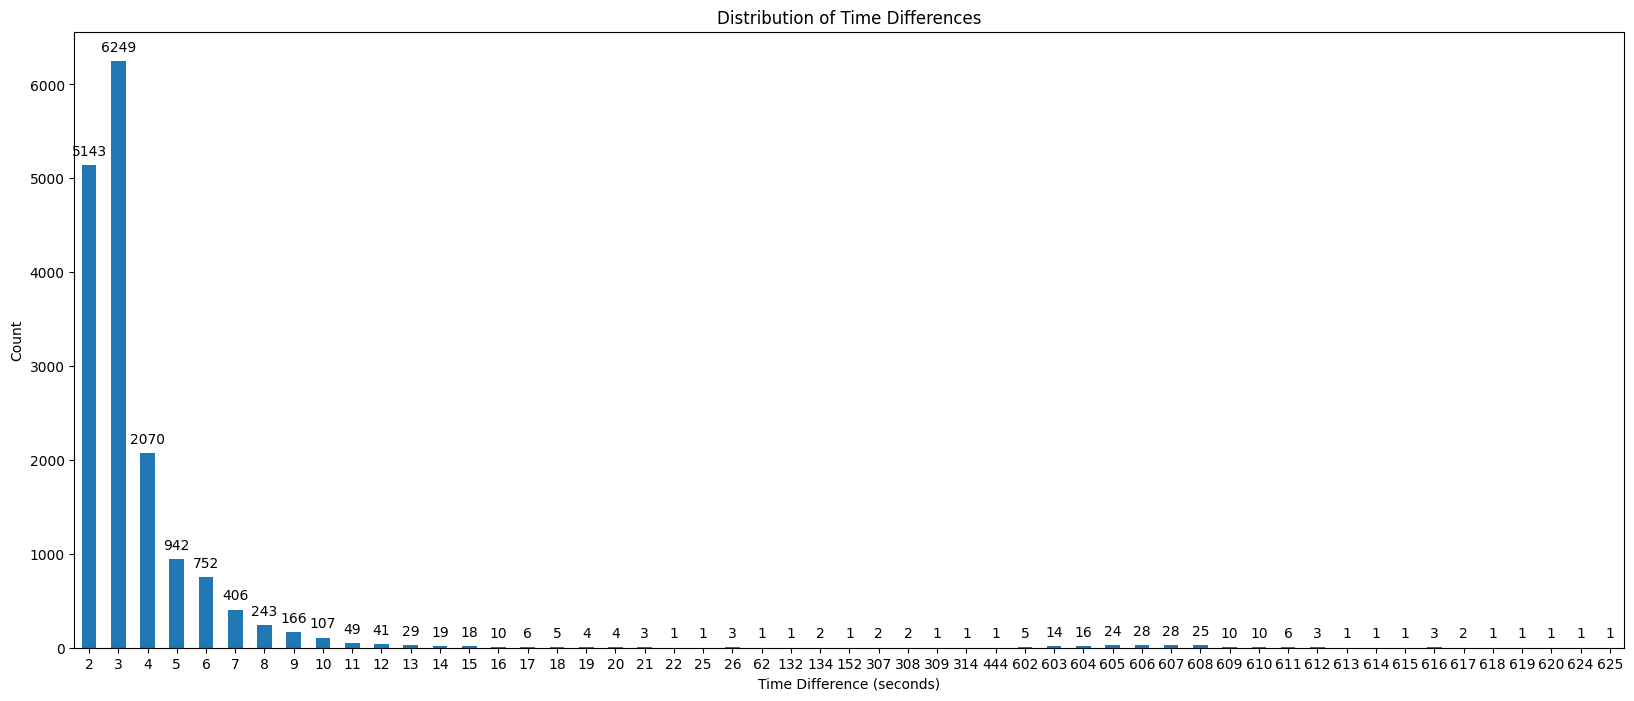

In [79]:
counts = matching_rows['event_time_seconds'].value_counts().sort_index()

plt.figure(figsize=(20, 8)) 
ax = counts.plot(kind='bar')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Time Differences')
plt.xticks(rotation=0)  

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()
plt.show()

In [80]:
matching_rows.head(50)

,event_type_x,event_time,symbol_x,kline_start_time_x,kline_close_time_x,interval_x,first_trade_id_x,last_trade_id_x,open_price_x,close_price_x,high_price_x,low_price_x,volume_x,number_of_trades_x,is_kline_closed_x,quote_assest_volume_x,take_buy_base_asset_volume_x,taker_buy_quote_asset_volume_x,ignore_x,time_diff_event_time_x,event_time_seconds_x,event_type_y,symbol_y,kline_start_time_y,kline_close_time_y,interval_y,first_trade_id_y,last_trade_id_y,open_price_y,close_price_y,high_price_y,low_price_y,volume_y,number_of_trades_y,is_kline_closed_y,quote_assest_volume_y,take_buy_base_asset_volume_y,taker_buy_quote_asset_volume_y,ignore_y,time_diff_event_time_y,event_time_seconds_y,_merge,time_diff_event_time,event_time_seconds
127,kline,2024-06-28 22:30:05.778000+02:00,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:44:59.999000+02:00,15m,131573932.0000000000,131573953.0000000000,0.0000117300,0.0000117400,0.0000117400,0.0000117300,1483158933.0000000000,22.0000000000,False,17399.5844093700,1483158933.0000000000,17399.5844093700,0.0000000000,0 days 00:00:02.778000,3,kline,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:34:59.999000+02:00,5m,131573932.0000000000,131573953.0000000000,0.0000117300,0.0000117400,0.0000117400,0.0000117300,1483158933.0000000000,22.0000000000,False,17399.5844093700,1483158933.0000000000,17399.5844093700,0.0000000000,0 days 00:00:02.782000,3,both,NaT,<NA>
128,kline,2024-06-28 22:30:08.218000+02:00,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:44:59.999000+02:00,15m,131573932.0000000000,131573970.0000000000,0.0000117300,0.0000117400,0.0000117400,0.0000117300,2388546728.0000000000,39.0000000000,False,28028.8371226700,1932925138.0000000000,22679.8396560700,0.0000000000,0 days 00:00:02.440000,2,kline,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:34:59.999000+02:00,5m,131573932.0000000000,131573970.0000000000,0.0000117300,0.0000117400,0.0000117400,0.0000117300,2388546728.0000000000,39.0000000000,False,28028.8371226700,1932925138.0000000000,22679.8396560700,0.0000000000,0 days 00:00:02.440000,2,both,0 days 00:00:02.440000,2
129,kline,2024-06-28 22:30:12.994000+02:00,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:44:59.999000+02:00,15m,131573932.0000000000,131573971.0000000000,0.0000117300,0.0000117500,0.0000117500,0.0000117300,2391192728.0000000000,40.0000000000,False,28059.9276226700,1935571138.0000000000,22710.9301560700,0.0000000000,0 days 00:00:04.776000,5,kline,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:34:59.999000+02:00,5m,131573932.0000000000,131573971.0000000000,0.0000117300,0.0000117500,0.0000117500,0.0000117300,2391192728.0000000000,40.0000000000,False,28059.9276226700,1935571138.0000000000,22710.9301560700,0.0000000000,0 days 00:00:04.776000,5,both,0 days 00:00:04.776000,5
130,kline,2024-06-28 22:30:16.994000+02:00,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:44:59.999000+02:00,15m,131573932.0000000000,131573972.0000000000,0.0000117300,0.0000117400,0.0000117500,0.0000117300,2394702280.0000000000,41.0000000000,False,28101.1297631500,1935571138.0000000000,22710.9301560700,0.0000000000,0 days 00:00:04,4,kline,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:34:59.999000+02:00,5m,131573932.0000000000,131573972.0000000000,0.0000117300,0.0000117400,0.0000117500,0.0000117300,2394702280.0000000000,41.0000000000,False,28101.1297631500,1935571138.0000000000,22710.9301560700,0.0000000000,0 days 00:00:04,4,both,0 days 00:00:04,4
131,kline,2024-06-28 22:30:19.994000+02:00,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:44:59.999000+02:00,15m,131573932.0000000000,131573973.0000000000,0.0000117300,0.0000117500,0.0000117500,0.0000117300,2433204407.0000000000,42.0000000000,False,28553.5297554000,1974073265.0000000000,23163.3301483200,0.0000000000,0 days 00:00:03,3,kline,PEPEUSDT,2024-06-28 22:30:00+02:00,2024-06-28 22:34:59.999000+02:00,5m,131573932.0000000000,131573973.0000000000,0.0000117300,0.0000117500,0.0000117500,0.0000117300,2433204407.0000000000,42.0000000000,False,28553.5297554000,19740732